Importing libraries :

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


Loading the dataset :

In [ ]:
data = pd.read_csv('Marketing.csv')
print(data.head())

  channel        sales  gender       CTR     ad_budget  engagement_score
0     SMS  1272.260844    Male  0.036703  48571.334147         96.993519
1   Email  1909.501912    Male  0.055478  33108.875460         65.105010
2     SMS  2225.827471    Male  0.063738  57131.723652        122.341949
3     SMS  1847.842268  Female  0.049308  47712.649737        104.085207
4   Email  2326.679407  Female  0.055253  36094.051391         74.923999


Identifying missing values in the dataset :

In [ ]:
# To calculate all missing values
missing_counts = data.isnull().sum()

# To print each column and its missing count
print(f"{'Column':<20} Missing Values")
print("-" * 30)

for col, count in missing_counts.items():
    print(f"{col:<20} {count}")

Column               Missing Values
------------------------------
channel              0
sales                0
gender               0
CTR                  0
ad_budget            0
engagement_score     0


Data Cleaning and Preparation :
- The dataset is cleaned to ensure completeness and validity.
- Rows containing missing values are removed to prevent bias in the analysis.
- The channel and gender columns are converted to categorical data types for efficient storage and processing.
- Duplicate entries are identified and removed to maintain data integrity.
- Value ranges are validated, ensuring CTR lies between 0 and 1 and ad_budget contains only positive values.



In [ ]:
# To remove missing values
data.dropna(inplace=True)

# Converting 'channel' and 'gender' to categorical types
data['channel'] = data['channel'].astype('category')
data['gender'] = data['gender'].astype('category')

# Removing duplicate rows
data.drop_duplicates(inplace=True)

# Validating value ranges for CTR and ad_budget
# Keeping the rows of only where CTR is between 0 and 1, and ad_budget is positive
data = data[(data['CTR'] >= 0) & (data['CTR'] <= 1)]
data = data[data['ad_budget'] > 0]

print("Data Cleaning Completed")
print(f"Rows after cleaning : {len(data)}")

# Checking the first few rows to confirm
print("\nSample Data After Cleaning :")
print(data.head())


Data Cleaning Completed
Rows after cleaning : 1500

Sample Data After Cleaning :
  channel        sales  gender       CTR     ad_budget  engagement_score
0     SMS  1272.260844    Male  0.036703  48571.334147         96.993519
1   Email  1909.501912    Male  0.055478  33108.875460         65.105010
2     SMS  2225.827471    Male  0.063738  57131.723652        122.341949
3     SMS  1847.842268  Female  0.049308  47712.649737        104.085207
4   Email  2326.679407  Female  0.055253  36094.051391         74.923999


Exploratory Data Analysis (EDA) :
- The dataset is explored to understand its structure, distributions, and relationships.
- Basic statistics are generated to review column types, ranges, and summary metrics.
- Unique value counts are examined for categorical variables to assess category distributions.
- Data distributions for numerical variables are visualized using histograms, while boxplots are used to detect potential outliers.
- Relationships between variables are investigated through scatterplots and calculating means to compare differences across categories.
- A correlation matrix is computed for numerical features, and a heatmap is used to identify strong positive or negative correlations.

In [ ]:
# The summary of statistics for numeric columns
print(data.describe())

             sales          CTR     ad_budget  engagement_score
count  1500.000000  1500.000000   1500.000000       1500.000000
mean   2090.656151     0.062143  49917.238014        104.833426
std     496.492127     0.017046  10364.774756         21.371012
min     607.676468     0.000523  16524.494035         42.386411
25%    1735.908547     0.050662  42853.226936         90.538099
50%    2086.134462     0.061528  49806.907299        104.861529
75%    2435.456267     0.073329  57028.105416        119.703807
max    3686.004141     0.120618  82401.391486        170.277692


In [ ]:
# The unique values for categorical variables
for col in data.select_dtypes(include=['category', 'object']).columns:
    print(f"\n{col} value counts:")
    print(data[col].value_counts().to_string())


channel value counts:
channel
Email           520
Social Media    492
SMS             488

gender value counts:
gender
Male      762
Female    738


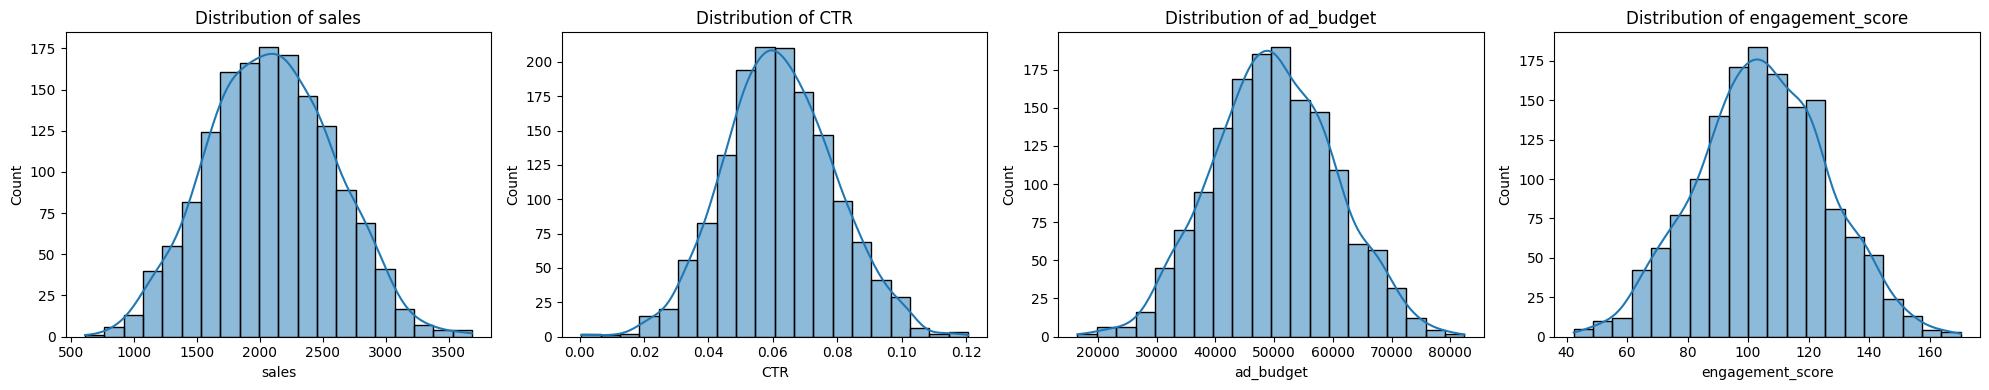

In [ ]:
# The distribution plots for numeric variables
numeric_cols = ['sales', 'CTR', 'ad_budget', 'engagement_score']

# Creating a grid of subplots that displays all distributions together.
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(20, 4))

for i, col in enumerate(numeric_cols):
    sns.histplot(data[col], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

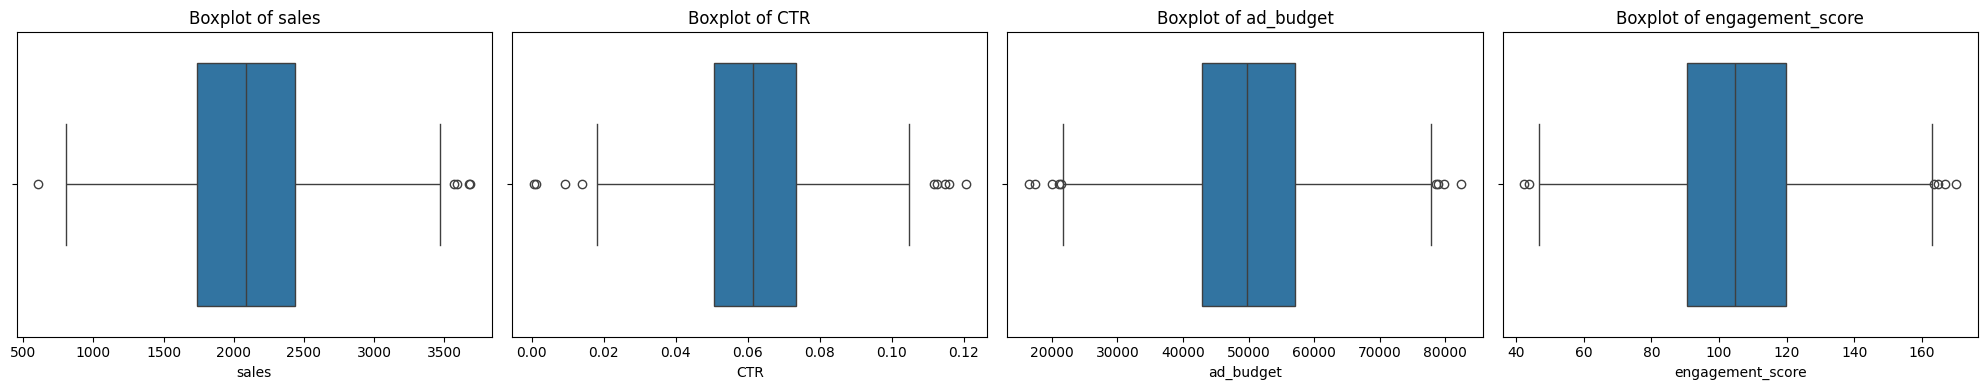

In [ ]:
# Creating boxplots for outlier detection
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(20, 4))

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

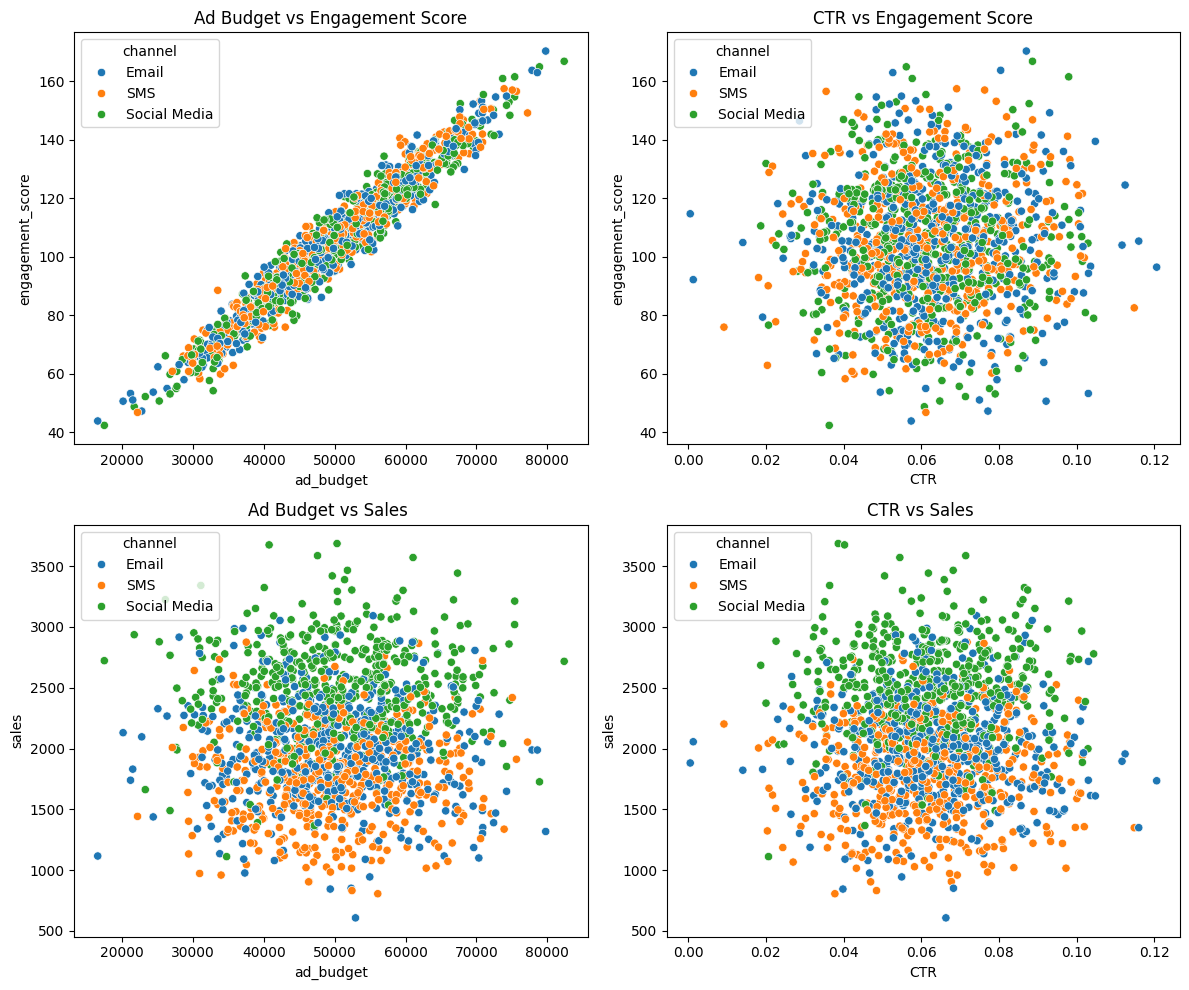

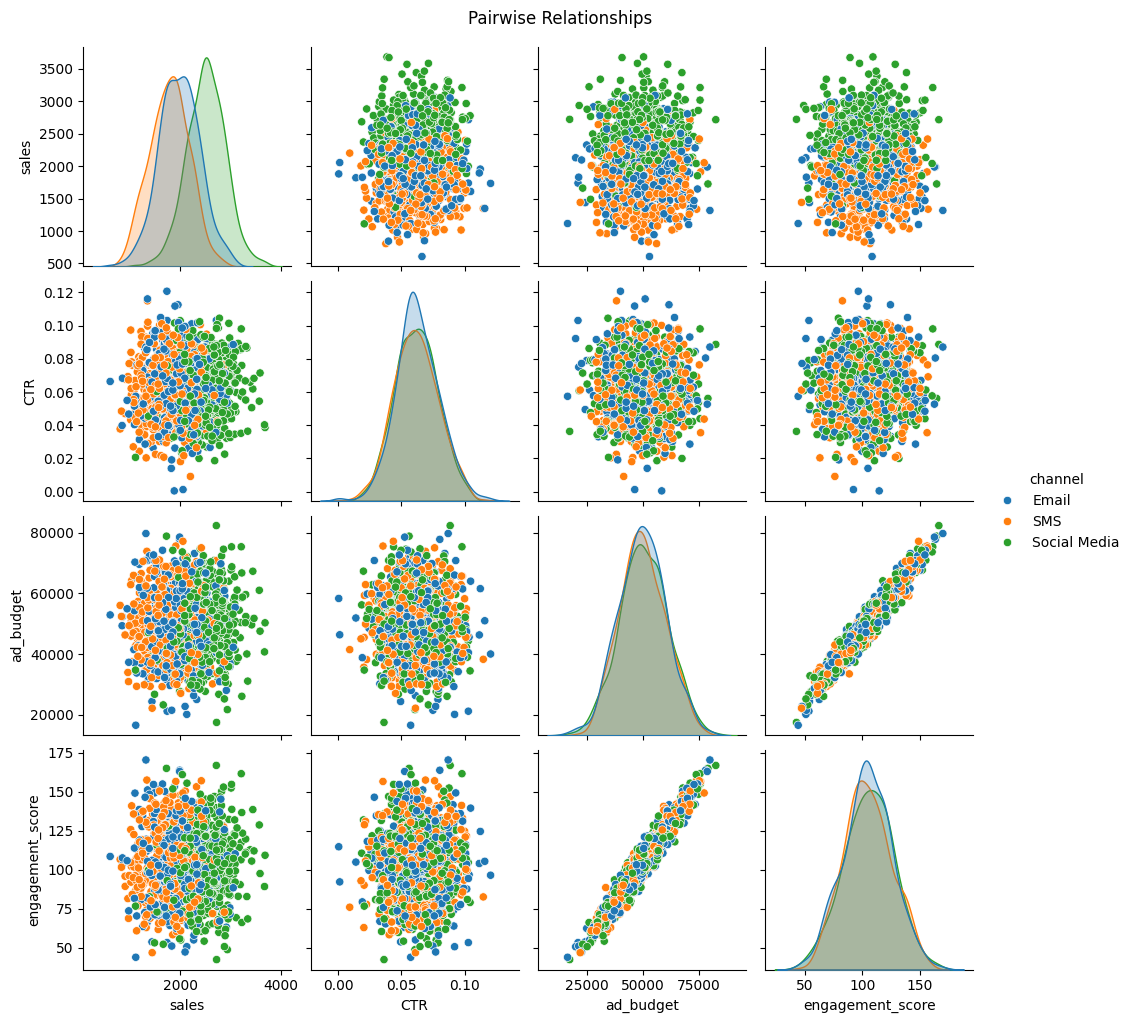

In [ ]:
# The relationship between ad_budget and engagement score
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Ad Budget vs Engagement Score
sns.scatterplot(ax=axes[0,0], x='ad_budget', y='engagement_score', data=data, hue='channel')
axes[0,0].set_title("Ad Budget vs Engagement Score") # by Channel

# CTR vs Engagement Score
sns.scatterplot(ax=axes[0,1], x='CTR', y='engagement_score', data=data, hue='channel')
axes[0,1].set_title("CTR vs Engagement Score") # by Channel

# Ad Budget vs Sales
sns.scatterplot(ax=axes[1,0], x='ad_budget', y='sales', data=data, hue='channel')
axes[1,0].set_title("Ad Budget vs Sales ") # by Channel

# CTR vs Sales
sns.scatterplot(ax=axes[1,1], x='CTR', y='sales', data=data, hue='channel')
axes[1,1].set_title("CTR vs Sales ") # by Channel

plt.tight_layout()
plt.show()

# Pairplot for all numeric variables
sns.pairplot(data, vars=['sales', 'CTR', 'ad_budget', 'engagement_score'], hue='channel')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

In [ ]:
# Calculating the average of sales by channel
avg_sales_per_channel = (
    data.groupby('channel', observed=True)['sales']
    .mean()
    .reset_index()
)
print(avg_sales_per_channel)

        channel        sales
0         Email  1982.010739
1           SMS  1783.564473
2  Social Media  2510.079635



The Correlation Matrix:

                  sales   CTR  ad_budget  engagement_score
sales              1.00  0.01       0.02              0.02
CTR                0.01  1.00      -0.03              0.03
ad_budget          0.02 -0.03       1.00              0.97
engagement_score   0.02  0.03       0.97              1.00


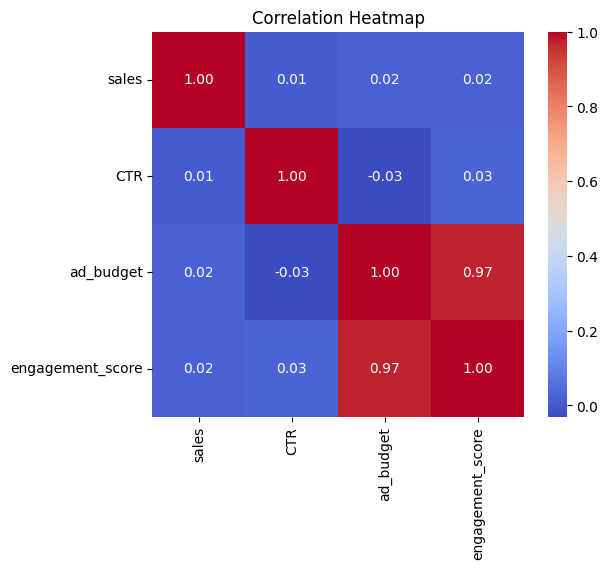

In [ ]:
# The correlation matrix & heatmap
corr_matrix = data[numeric_cols].corr().round(2)
print("\nThe Correlation Matrix:\n")
print(corr_matrix)

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Statistical Inference :
- The dataset is analyzed to answer key questions about differences in sales and engagement.
- Sales are compared across channels using a one-way ANOVA to determine which channel performs better in generating sales.
- A Tukey HSD test can be applied to identify which channel pairs differ significantly.
- Engagement scores are compared between genders using an independent t-test to assess whether male and female customers respond differently.
- Barplots with mean ± error bars can be used to visualize these differences clearly.

In [ ]:
# Numeric summary
print("Summary statistics for numeric columns : \n ")
print(data.describe())

# The unique values for categorical columns
for col in data.select_dtypes(include=['object', 'category']).columns:
    print(f"\n{col} value counts:")
    print(data[col].value_counts().to_string())


Summary statistics for numeric columns : 
 
             sales          CTR     ad_budget  engagement_score
count  1500.000000  1500.000000   1500.000000       1500.000000
mean   2090.656151     0.062143  49917.238014        104.833426
std     496.492127     0.017046  10364.774756         21.371012
min     607.676468     0.000523  16524.494035         42.386411
25%    1735.908547     0.050662  42853.226936         90.538099
50%    2086.134462     0.061528  49806.907299        104.861529
75%    2435.456267     0.073329  57028.105416        119.703807
max    3686.004141     0.120618  82401.391486        170.277692

channel value counts:
channel
Email           520
Social Media    492
SMS             488

gender value counts:
gender
Male      762
Female    738


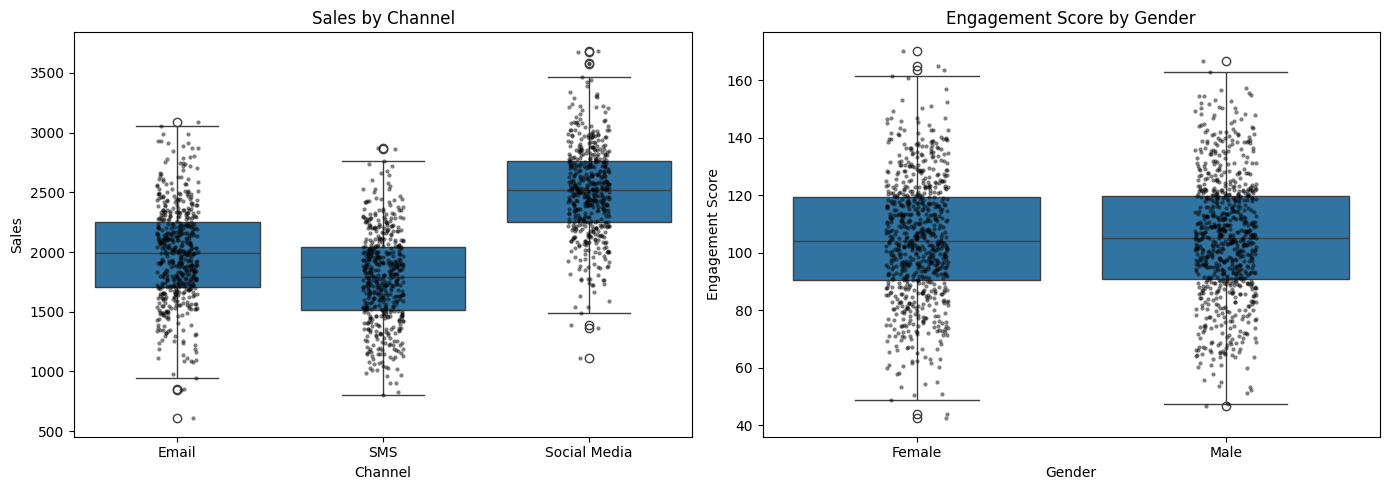

In [ ]:
# Creating side-by-side boxplots with data points
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot for Sales by Channel
sns.boxplot(x='channel', y='sales', data=data, ax=axes[0])
sns.stripplot(
    x='channel',
    y='sales',
    data=data,
    ax=axes[0],
    color='black',
    size=3,
    alpha=0.5
)
axes[0].set_title('Sales by Channel')
axes[0].set_xlabel('Channel')
axes[0].set_ylabel('Sales')

# Boxplot for Engagement by Gender
sns.boxplot(x='gender', y='engagement_score', data=data, ax=axes[1])
sns.stripplot(
    x='gender',
    y='engagement_score',
    data=data,
    ax=axes[1],
    color='black',
    size=3,
    alpha=0.5
)
axes[1].set_title('Engagement Score by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Engagement Score')

plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import f_oneway

# Preparing groups
channels = data['channel'].unique()
sales_groups = [data.loc[data['channel'] == ch, 'sales'] for ch in channels]

# One-way ANOVA by Channel
anova_result = f_oneway(*sales_groups)

print("F-statistic : ", anova_result.statistic)
print("p-value : ", anova_result.pvalue)
if anova_result.pvalue < 0.05 :
    print("Significant difference in sales between channels")
else :
    print("No significant difference in sales between channels")

F-statistic :  449.8439436173806
p-value :  1.0335322806985603e-153
Significant difference in sales between channels


In [ ]:
from scipy.stats import ttest_ind

# Separating engagement scores by gender
male_engagement = data.loc[data['gender'] == 'Male', 'engagement_score']
female_engagement = data.loc[data['gender'] == 'Female', 'engagement_score']

# Independent t-test by Gender
t_result = ttest_ind(male_engagement, female_engagement, equal_var=False)  # Welch's t-test

print("t-statistic :", round(t_result.statistic, 3))
print("p-value :", '{:.3e}'.format(t_result.pvalue))

if t_result.pvalue < 0.05 :
    print("Significant difference in engagement between genders")
else:
    print("No significant difference in engagement between genders")


t-statistic : 0.451
p-value : 6.520e-01
No significant difference in engagement between genders


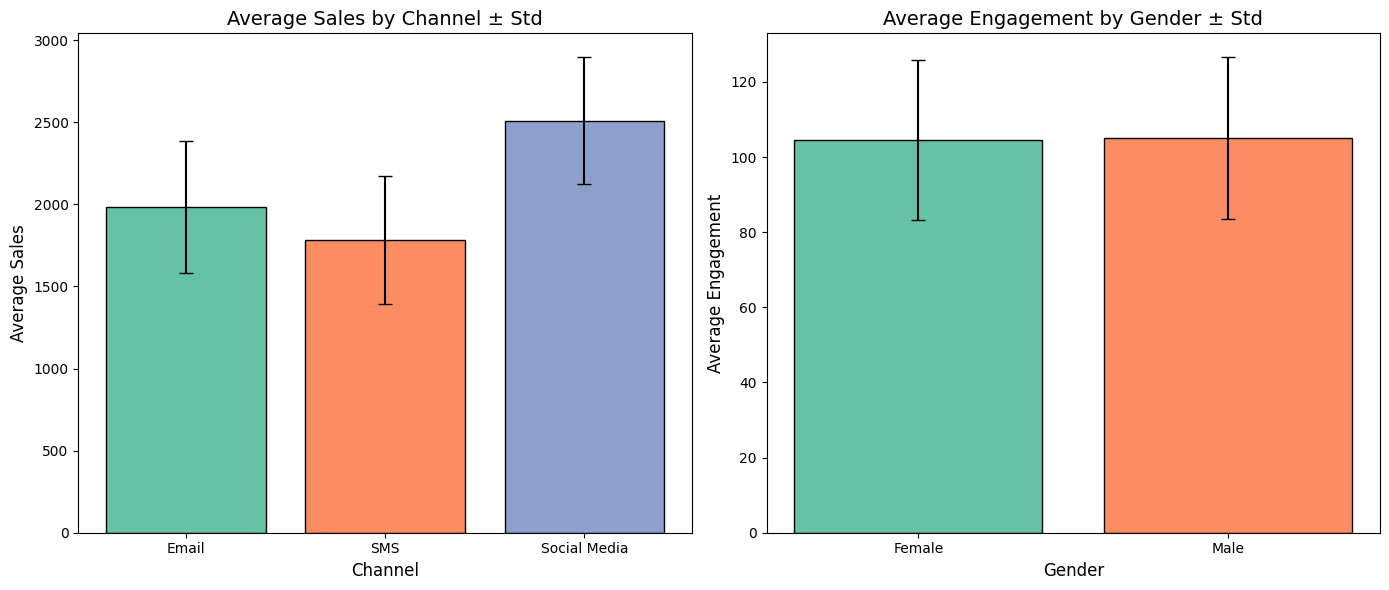

In [ ]:
# Computing the summary stats
channel_summary = data.groupby('channel', observed=True)['sales'].agg(['mean', 'std']).reset_index()
gender_summary = data.groupby('gender', observed=True)['engagement_score'].agg(['mean', 'std']).reset_index()

# Create side-by-side barplots
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Barplot 1 : Sales by Channel
axes[0].bar(
    x=channel_summary['channel'],
    height=channel_summary['mean'],
    yerr=channel_summary['std'],
    capsize=5,
    color=sns.color_palette('Set2'),
    edgecolor='black'
)
axes[0].set_title('Average Sales by Channel ± Std', fontsize=14)
axes[0].set_xlabel('Channel', fontsize=12)
axes[0].set_ylabel('Average Sales', fontsize=12)

# Barplot 2 : Engagement by Gender
axes[1].bar(
    x=gender_summary['gender'],
    height=gender_summary['mean'],
    yerr=gender_summary['std'],
    capsize=5,
    color=sns.color_palette('Set2'),
    edgecolor='black'
)
axes[1].set_title('Average Engagement by Gender ± Std', fontsize=14)
axes[1].set_xlabel('Gender', fontsize=12)
axes[1].set_ylabel('Average Engagement', fontsize=12)

plt.tight_layout()
plt.show()

Predictive Modeling :
- Linear regression is used to model the relationship between features and engagement, helping to predict engagement scores based on key variables.
- Scatter Plot (Predicted vs Actual) visualizes how well the model’s predictions align with actual engagement, making it easy to assess model accuracy and fit.

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
# Preparing features & target
X = data[['ad_budget', 'CTR']]       # Predictors
y = data['engagement_score']         # Target

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

Training samples: 1200, Test samples: 300


In [ ]:
# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# The coefficients :
print("Model Coefficients : \n")
for feat, coef in zip(X.columns, model.coef_):
    print(f"{feat} : {coef:.3f}")
print(f"Intercept : {model.intercept_:.3f}")

Model Coefficients : 

ad_budget : 0.002
CTR : 71.952
Intercept : 0.894


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Taking square root manually
r2 = r2_score(y_test, y_pred)

print(f"RMSE : {rmse:.3f}")
print(f"R² : {r2:.3f}")

RMSE : 5.419
R² : 0.933


Residuals Summary : 

count    300.000000
mean      -0.388461
std        5.413742
min      -15.220155
25%       -4.407025
50%        0.150271
75%        3.179434
max       15.539817


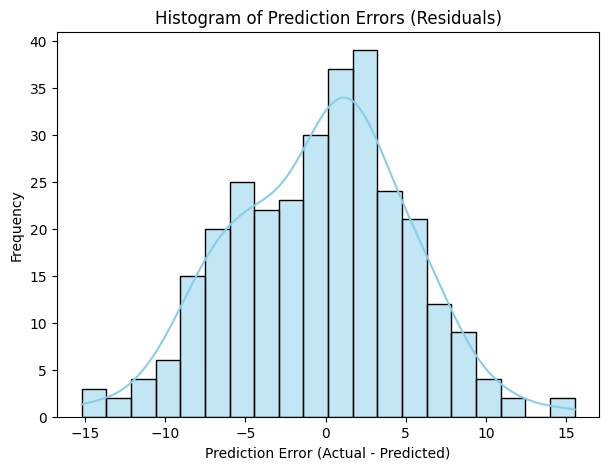

In [ ]:
# Residuals (Prediction Errors)
residuals = y_test - y_pred

# Summary of residuals without Series info
print("Residuals Summary : \n")
print(residuals.describe().to_string())

# Histogram of residuals
plt.figure(figsize=(7,5))
sns.histplot(residuals, bins=20, kde=True, color='skyblue')
plt.title("Histogram of Prediction Errors (Residuals)")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Multicollinearity Check (VIF)
X_with_const = sm.add_constant(X)  # Add intercept
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i+1) for i in range(len(X.columns))]

print("Variance Inflation Factor (VIF) : \n")
print(vif_data)

Variance Inflation Factor (VIF) : 

     feature       VIF
0  ad_budget  1.001022
1        CTR  1.001022


Clarified answers to the questions

F-statistic : 449.844
p-value : 1.034e-153

Average sales by channel:
channel
Social Media    2510.079635
Email           1982.010739
SMS             1783.564473
Name: sales, dtype: float64

Highest average sales : Social Media (2510.08)
Lowest average sales : SMS (1783.56) 



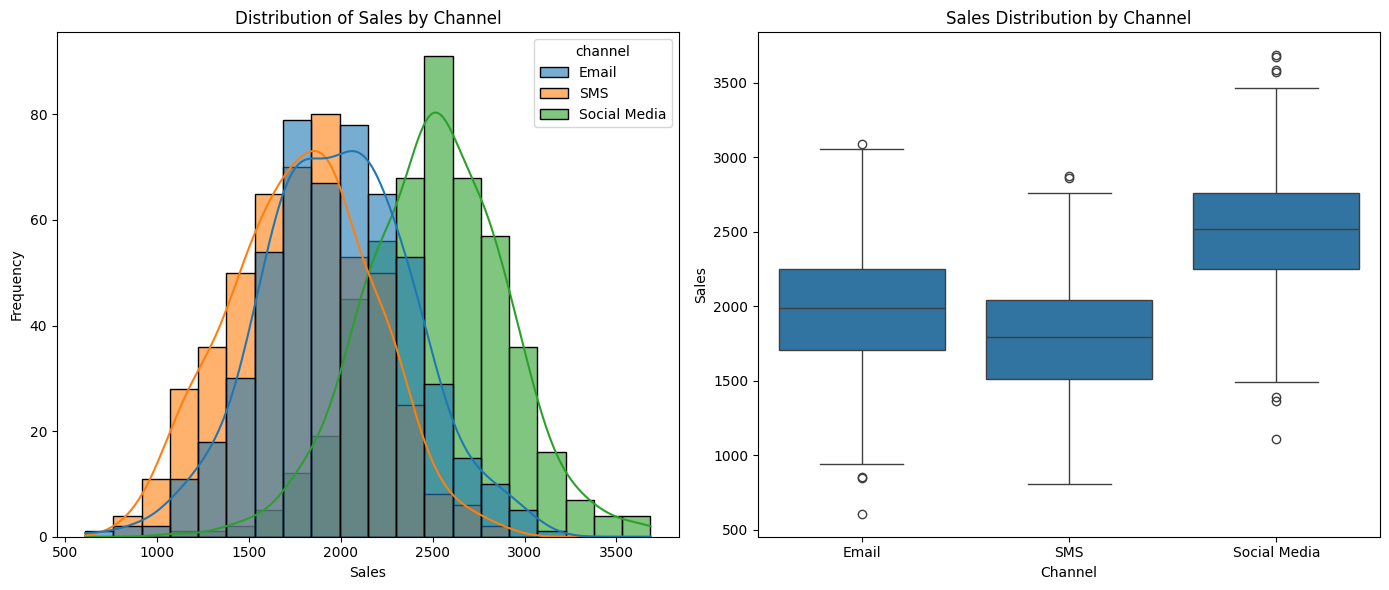

In [ ]:
#Question 1 : Which channel performs better in generating sales?
print("F-statistic :", round(anova_result.statistic, 3))
print("p-value :", '{:.3e}'.format(anova_result.pvalue))

# Computing mean sales per channel
channel_summary = data.groupby('channel', observed=True)['sales'].mean().sort_values(ascending=False)
print("\nAverage sales by channel:")
print(channel_summary)

highest_channel = channel_summary.idxmax()
lowest_channel = channel_summary.idxmin()
print(f"\nHighest average sales : {highest_channel} ({channel_summary[highest_channel]:.2f})")
print(f"Lowest average sales : {lowest_channel} ({channel_summary[lowest_channel]:.2f}) \n")

# Side-by-side plots (Histogram + Boxplot)
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# For a histogram
sns.histplot(
    data=data,
    x='sales',
    hue='channel',
    bins=20,
    kde=True,
    alpha=0.6,
    ax=axes[0]
)
axes[0].set_title('Distribution of Sales by Channel')
axes[0].set_xlabel('Sales')
axes[0].set_ylabel('Frequency')

# For a boxplot
sns.boxplot(
    x='channel',
    y='sales',
    data=data,
    ax=axes[1]
)
axes[1].set_title('Sales Distribution by Channel')
axes[1].set_xlabel('Channel')
axes[1].set_ylabel('Sales')

plt.tight_layout()
plt.show()

ANOVA indicates a significant difference in sales across channels (p < 0.05).

Highest average sales: Social Media, lowest: SMS.

Social Media is the channel that performs the best at generating sales.

Histogram and boxplot visually confirm that Social Media generally generates the highest sales, followed by Email and SMS.


Average engagement by gender:
gender
Female    104.58
Male      105.08

Higher average engagement: Male (105.08)
Lower average engagement: Female (104.58) 


Sample engagement scores for Female customers:
gender  engagement_score
Female        104.085207
Female         74.923999
Female         83.766913
Female        124.842457
Female        133.186899
Female         62.387017
Female        146.902711
Female        110.497149
Female        104.085542
Female         85.854574

Sample engagement scores for Male customers:
gender  engagement_score
  Male         96.993519
  Male         65.105010
  Male        122.341949
  Male        104.091486
  Male        133.133176
  Male        135.546604
  Male         91.373486
  Male        110.446243
  Male         68.464955
  Male         89.392231


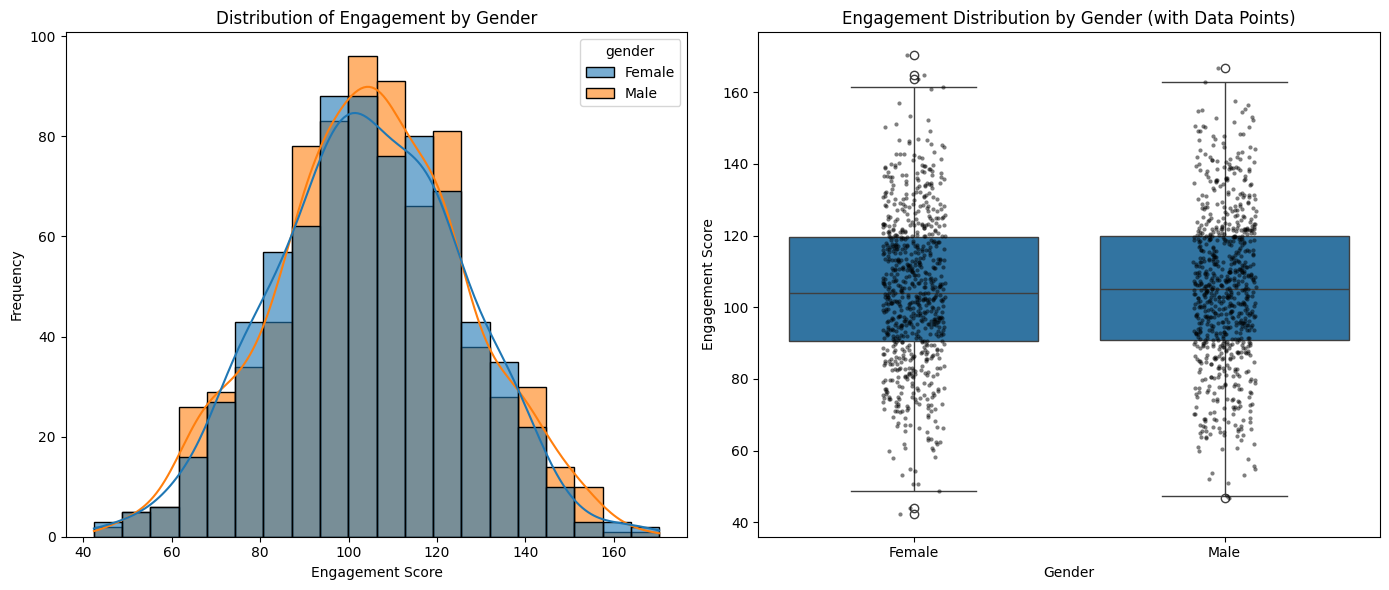

In [ ]:
# Question 2 : Do male and female customers respond differently in terms of engagement?
# Computing the mean engagement by gender
gender_summary = data.groupby('gender', observed=True)['engagement_score'].mean()
print("\nAverage engagement by gender:")
print(gender_summary.round(2).to_string())  # cleaner output

highest_gender = gender_summary.idxmax()
lowest_gender = gender_summary.idxmin()
print(f"\nHigher average engagement: {highest_gender} ({gender_summary[highest_gender]:.2f})")
print(f"Lower average engagement: {lowest_gender} ({gender_summary[lowest_gender]:.2f}) \n")

# Optional: Show sample engagement scores by gender
print("\nSample engagement scores for Female customers:")
print(data[data['gender'] == 'Female'][['gender', 'engagement_score']]
      .head(10)
      .to_string(index=False))

print("\nSample engagement scores for Male customers:")
print(data[data['gender'] == 'Male'][['gender', 'engagement_score']]
      .head(10)
      .to_string(index=False))

# Side-by-side plots (Histogram + Boxplot with data points)
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Histogram
sns.histplot(
    data=data,
    x='engagement_score',
    hue='gender',
    bins=20,
    kde=True,
    alpha=0.6,
    ax=axes[0]
)
axes[0].set_title('Distribution of Engagement by Gender')
axes[0].set_xlabel('Engagement Score')
axes[0].set_ylabel('Frequency')

# Boxplot with individual data points
sns.boxplot(
    x='gender',
    y='engagement_score',
    data=data,
    ax=axes[1]
)
sns.stripplot(
    x='gender',
    y='engagement_score',
    data=data,
    ax=axes[1],
    color='black',
    size=3,
    alpha=0.5
)
axes[1].set_title('Engagement Distribution by Gender (with Data Points)')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Engagement Score')

plt.tight_layout()
plt.show()


No. There is no significant difference in engagement between male and female customers (p >= 0.05).

Higher average engagement : Male

Lower average : Female



MARKETING IMPACT DECODER 

Model Performance :
• R² (Accuracy) : 0.93 (1.0 = perfect prediction)
• RMSE (Error) : ±5.36 engagement points

Key Drivers :
• Every $1 ad spend = +0.0020 engagement points
• Every 1% CTR increase = +80.28 engagement points


BUDGET ALLOCATION SIMULATOR ($1,000 Campaign)

EMAIL           = Expected Engagement : 1.9 points

SOCIAL MEDIA    = Expected Engagement : 2.4 points
Best performing channel — 20% better than average

SMS             = Expected Engagement : 1.7 points



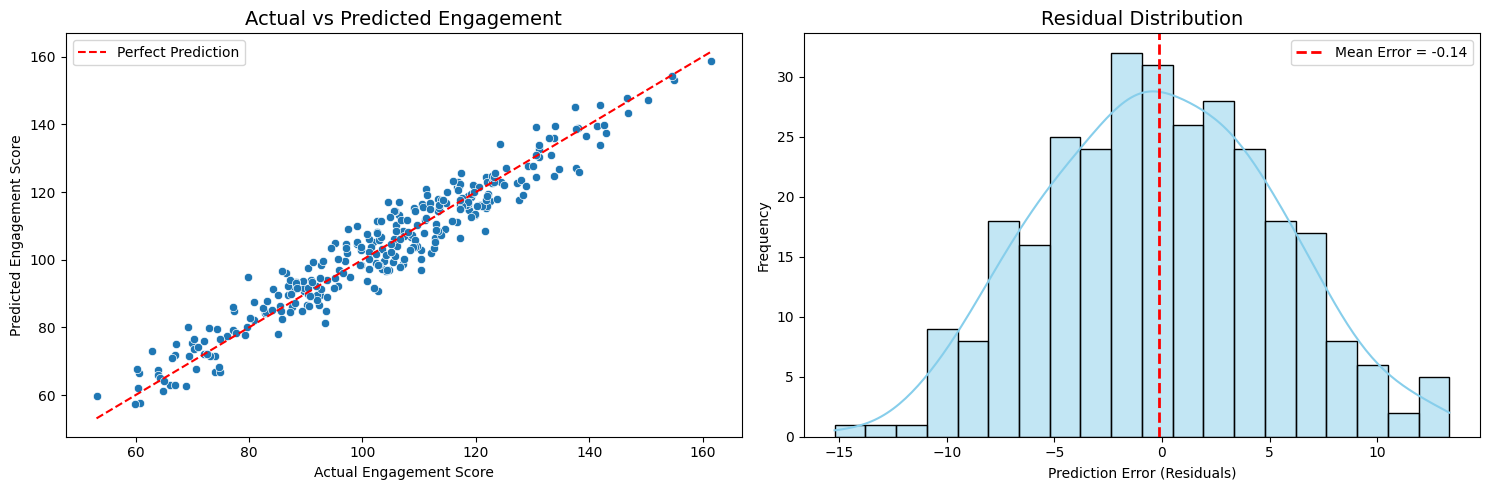

In [ ]:
# Question 3 : Can we predict engagement score using advertising budget and click-through rate?
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Data Prep (previously cleaned data)
X = data[['ad_budget', 'CTR']]
y = data['engagement_score']

# Train-test split (stratify by channel)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=data['channel']
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Converting coefficients to natural units
coef_natural = model.coef_ / scaler.scale_

# Model performance
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)
rmse = np.sqrt(mean_squared_error(y_test, test_pred))

#  Business insights
print("\nMARKETING IMPACT DECODER \n")
print(f"Model Performance :")
print(f"• R² (Accuracy) : {test_r2:.2f} (1.0 = perfect prediction)")
print(f"• RMSE (Error) : ±{rmse:.2f} engagement points\n")

print("Key Drivers :")
print(f"• Every $1 ad spend = +{coef_natural[0]:.4f} engagement points")
print(f"• Every 1% CTR increase = +{coef_natural[1]:.2f} engagement points\n")

# ROI Simulator (Channel-Aware)
print("\nBUDGET ALLOCATION SIMULATOR ($1,000 Campaign)\n")

# Getting the actual channel multipliers
channel_performance = data.groupby('channel', observed=True)['sales'].mean()
best_channel = channel_performance.idxmax()

performance_ratio = channel_performance / channel_performance.mean()

for channel in ['Email', 'Social Media', 'SMS']:
    engagement = 1000 * coef_natural[0] * performance_ratio[channel]
    print(f"{channel.upper():<15} = Expected Engagement : {engagement:.1f} points")

    if channel == best_channel:
        improvement = (performance_ratio[channel] - 1) * 100
        print(f"Best performing channel — {improvement:.0f}% better than average")
    print()

# Visual diagnostics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Actual vs Predicted Engagement
sns.scatterplot(x=y_test, y=model.predict(X_test_scaled), ax=ax1)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', label='Perfect Prediction')
ax1.set_title("Actual vs Predicted Engagement", fontsize=14)
ax1.set_xlabel("Actual Engagement Score")
ax1.set_ylabel("Predicted Engagement Score")
ax1.legend()

# Residual distribution with mean error line
residuals = y_test - model.predict(X_test_scaled)
mean_error = residuals.mean()

sns.histplot(residuals, kde=True, ax=ax2, bins=20, color='skyblue')
ax2.axvline(x=mean_error, color='red', linestyle='--', linewidth=2,
            label=f'Mean Error = {mean_error:.2f}')
ax2.set_title("Residual Distribution", fontsize=14)
ax2.set_xlabel("Prediction Error (Residuals)")
ax2.set_ylabel("Frequency")
ax2.legend()

plt.tight_layout()
plt.show()

Yes, linear regression predicts engagement using advertising budget and click-through rate (CTR).

R² = 0.933 indicates the proportion of variance in engagement explained by these predictors.

RMSE = 5.419 shows the average prediction error magnitude.